For this homework, make sure that you format your notbook nicely and cite all sources in the appropriate sections. Programmatically generate or embed any figures or graphs that you need.

Names: Brant Wesley, Liam Pavlovic

Step 1: Word2Vec paper questions
---------------------------


    1. Describe how a CBOW word embedding is generated.
        CBOW uses a context window which is a certain number of neighboring words to the left and right that the model considers when trying to predict the middle word. The context window size recommended in the paper is 4. In this case, the model would consider four words to the left and four words to the right and tries to predict the middle word. The order of these words does not matter, which is why its considered a bag-of-words model.
        
    2. What is a CBOW word embedding and how is it different from a skip-gram word embedding?
        A CBOW word embedding predicts the current word based on the given context words and is the opposite of a skip-gram word embedding, which predicts the context words based on the given current word. Skip-gram also weights the context words based on their distance from the current word. Thus, skip-gram considers position and cannot be considered a bag-of-words model.
        
    3. What is the task that the authors use to evaluate the generated word embeddings?
        To create a task for the embedding, the authors select a word and a type of relation. For example, the authors could select the word "beauty" and the relation between "hope" and "hopeful". The correct answer to this task would be "beautiful". The authors considered 5 types of semantic relations (similarity in meaning/connotation) and 9 types of syntatic relations (grammatic similarity) and tested the vectors ability to recognize that relation over multiple words.
        
    4. What are PCA and t-SNE? Why are these important to the task of training and interpreting word embeddings?
        PCA is Principal Component Analysis analyzes which dimensions of a vector are correlated and "squeezing" them into a single component. At the end, the remaining components of the vector should be uncorrelated. This is done to reduce the dimensionality of the vector. PCA could help reduce the size of the embedding vectors by representing correlating types of similarity in one value. t-SNE is used for dimensionality reduction and is useful for visualizing datasets with high dimensionality. t-SNE works similarly to PCA, but has greater focus on preserving small differences between vectors, whereas PCA focuses on maintaining major differences between vectors. These are important for interpreting and training word embeddings as they make the embeddings more easily visualized reduce the number of dimensions in the data. Word embeddings are often high-dimension vectors, representing them on a 2D plane without a method to faithfully reduce their dimensions would be difficult.
        
        

Step 2: Train your own word embeddings
--------------------------------

The spooky authors dataset contains sentences from published books from a variety of authors in the horror genre. The text from this dataset will be almost completely if not completely grammatically correct because it has been edited by professional authors. The dataset contains other information about the source of the text but they will be ignored for the purposes of this project. Horror writing often involves a lot of descriptive lanugae, so the dataset will likely be heavy on adjecives and specific nouns. 

Describe what data set you have chosen to compare and contrast with the Spooky Authors Dataset. Make sure to describe where it comes from and it's general properties.

Our secondary dataset is the complete text of the Lord of the Rings series. This txt file was acquired from a public github repository. The dataset contains text from books all written by the same author. The text will be almost completely if not completely grammatically correct, as it has been edited by professional editors. The text involves exploring a fantasy world so it contains many story-specific proper nouns (i.e. names of people/places) and many hyphentated nouns (i.e. hobbit-hole).

In [1]:
# import your libraries here
import numpy as np
import pandas as pd
import re 
from pathlib import Path
import random

from gensim.models import Word2Vec
import keras

Using TensorFlow backend.


### a) Train embeddings on GIVEN dataset

In [16]:
# code to train your word embeddings

# Read the file 'spooky-author-identification/train.csv' 
# and prepare the training data in the following format

# data = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]

train_path = Path('spooky-author-identification/train.csv')


spooky_df = pd.read_csv(train_path)
spooky_data = [list(re.findall(r'(?:\w+\-)+\w+|(?:\w+\')+\w+|\w+', spook.lower())) for spook in spooky_df['text'].tolist()]

spooky_data = [["<ssstart>"] + tokens + ["<sssend>"] for tokens in spooky_data]



In [3]:
# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
EMBEDDING_SIZE = 200
num_epochs = 30

# Train the Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. 
# But feel free to explore other 
# options too:
# sg = 1
# window = 5
# size = EMBEDDING_SIZE
# min_count = 1

spooky_vec = Word2Vec(sentences=spooky_data, size=EMBEDDING_SIZE, window=5, min_count=1)
spooky_vec.save("spooky_word2vec.model")

spooky_vec.train(spooky_data, epochs=num_epochs, total_words=spooky_vec.corpus_total_words)
spooky_vec.save("spooky_word2vec_trained.model")

In [4]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
print('Vocab size {}'.format(len(spooky_vec.wv.vocab)))

Vocab size 25604


In [5]:
# You can save file in txt format, then load later if you wish.
spooky_vec.wv.save_word2vec_format('spooky_embeddings.txt', binary=False)

### b) Train embedding on YOUR dataset

In [6]:
# then do a second data set
lf = open('lotr/lotr.txt')
lcont = lf.read()
lcont = re.sub(r'\s+|####-', ' ', lcont)
sent = re.split(r'[.?!]\s+(?=[A-Z])', lcont)
lotr_data = [list(re.findall(r'(?:\w+\-)+\w+|(?:\w+\')+\w+|\w+', s.lower())) for s in sent]
lotr_data = [["<ssstart>"] + tokens + ["<sssend>"] for tokens in lotr_data]


lotr_vec = Word2Vec(sentences=lotr_data, size=EMBEDDING_SIZE, window=5, min_count=1, sg=1)
lotr_vec.save("lotr_word2vec.model")

print(len(lotr_vec.wv.vocab))
lotr_vec.train(lotr_data, epochs=num_epochs, total_words=lotr_vec.corpus_total_words)
lotr_vec.save("lotr_word2vec_trained.model")
lotr_vec.wv.save_word2vec_format('lotrembeddings.txt', binary=False)

16242


What text-normalization and pre-processing did you do and why?
We tokenized using white-space. Since this model will be used for sentence generation, we thought it was ideal to keep words in the form they were seen in the text. Splitting up contractions would lead to more nonsensical sentences because of the possibility that a part of the contraction would be produced without the rest. We also wanted to keep hyphenated words together since the hyphen is often gramatically necesarry for the words to be next to one another. To accomplish this, we used a regular expression that recognizes all instances of continuous alphanumerics and continous alphanumerics with any number of internal hyphens and/or apostrophes. 

We lowered the entirety of the text for consistency and split it into sentences for the purpose of making ngrams. We added start and end tokens to the beginning and end of the sentences to help with seeding and stopping text generation. We used an non-conventional start and end token because we found that the Keras Tokenizer treated the convential start and end tags as the same token.

Splitting into sentences was done by splitting wherever the text had a end punctuation followed by any number of spaces and a capital letter. Both of the texts we worked with were from published books, so we assumed that they would be grammtically correct and this would be a safe splitting method. 


Step 3: Evaluate the differences between the word embeddings
----------------------------


In [7]:
#makes a list of 20 random words that the corpora share for embedding comparison
c = 0
shared_words = []
lshuf = list(lotr_vec.wv.vocab).copy()
random.shuffle(lshuf)
for word in lshuf:
    if word in spooky_vec.wv.vocab:
        shared_words.append(word)
        c += 1
    if c >= 20:
        break
shared_words

['striven',
 'skirts',
 'brim',
 'ring',
 'been',
 'limited',
 'heroes',
 'dell',
 'filthy',
 'course',
 'respected',
 'laboriously',
 'situation',
 'amused',
 'shrivelled',
 'tomorrow',
 'protection',
 'including',
 'strike',
 'providing']

In [8]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def tsne_word2vec(model, vocab_list, perplexity=30, num_words=50, title='figure'):
    """
    adapted from the kaggle article
    """
    
    # truncate the vocab list so as not to use the full vocab
    tsne_words = vocab_list[:num_words]
    
    # iterate through the words and get the most similar words to plot
    for word in vocab_list[:num_words]:
        for similar, _ in model.most_similar(word):
            if similar not in tsne_words:
                tsne_words.append(similar)
    
    # set words and values to use in the tsne model
    words = [word for word  in tsne_words]
    values = [model[word]  for word in tsne_words]
        
    # make the model and transform the values
    tsne_model = TSNE(perplexity=perplexity, n_components=2, init='pca', n_iter=2500)
    new_vals = tsne_model.fit_transform(values)
    
    # make xs and ys for plotting
    x = [value[0] for value in new_vals]
    y = [value[1] for value in new_vals]
    
    # plot each tsne value for all the words in the tsne vocab, show the figure
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(words[i],
                    xy=(x[i], y[i]),
                    xytext=(5,2),
                    textcoords='offset points',
                    ha='center',
                    va='bottom')
    plt.title(label=title)
    plt.show()
        


/Users/liampav/opt/anaconda3/envs/nlp2/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if sys.path[0] == '':
/Users/liampav/opt/anaconda3/envs/nlp2/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


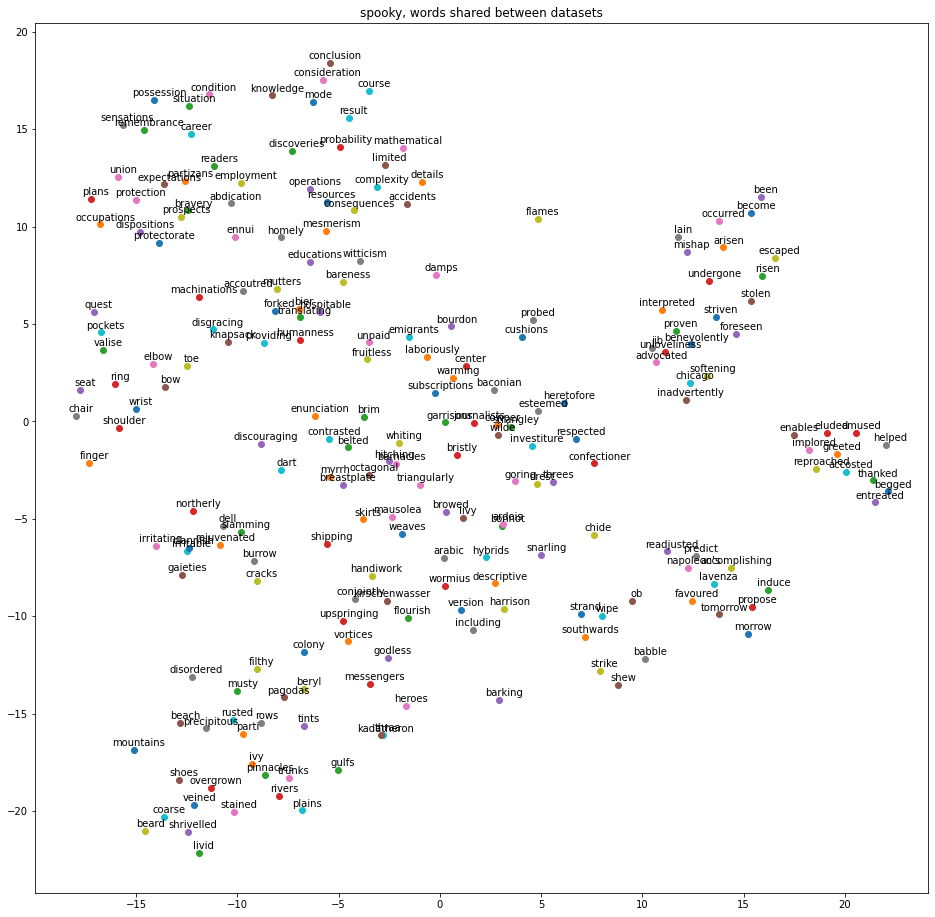

/Users/liampav/opt/anaconda3/envs/nlp2/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if sys.path[0] == '':
/Users/liampav/opt/anaconda3/envs/nlp2/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


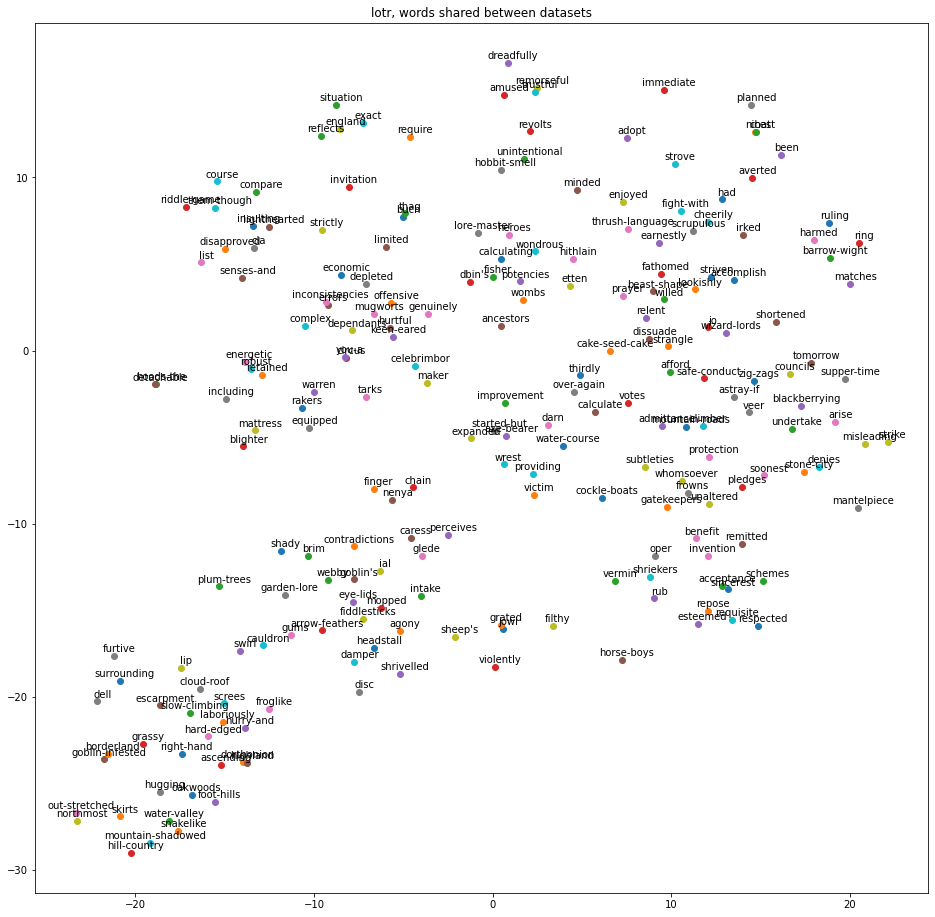

/Users/liampav/opt/anaconda3/envs/nlp2/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if sys.path[0] == '':
/Users/liampav/opt/anaconda3/envs/nlp2/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


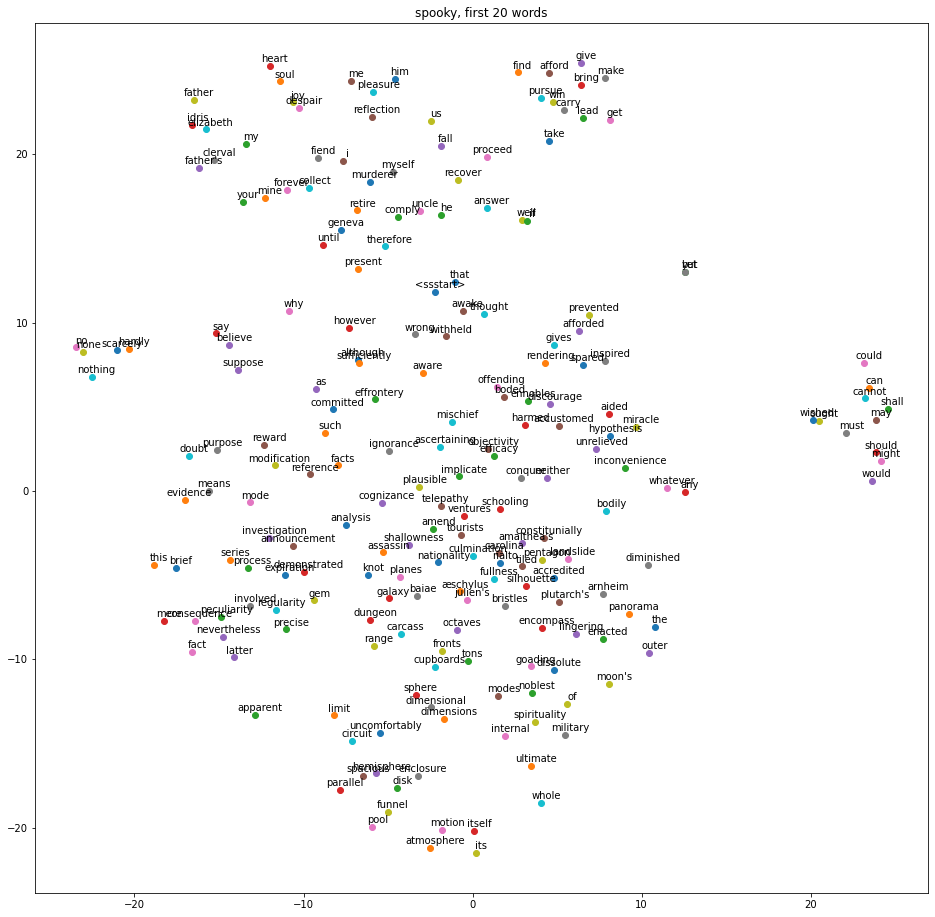

/Users/liampav/opt/anaconda3/envs/nlp2/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if sys.path[0] == '':
/Users/liampav/opt/anaconda3/envs/nlp2/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


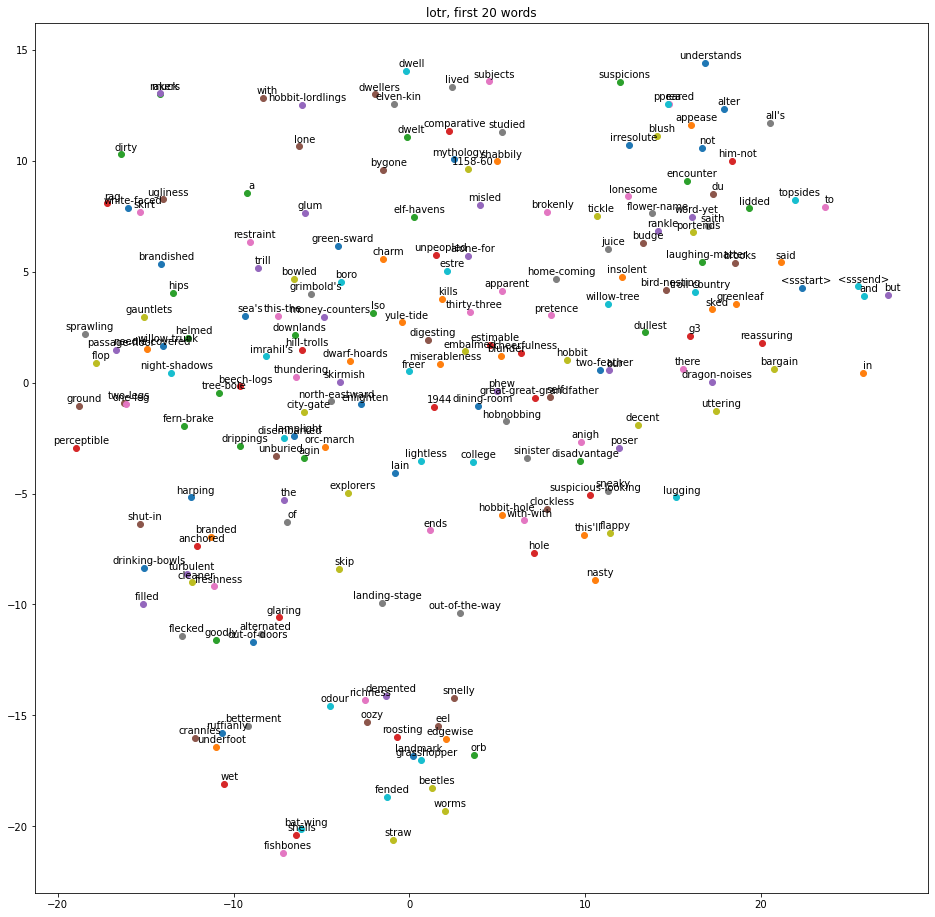

In [9]:
tsne_word2vec(spooky_vec, vocab_list=shared_words, perplexity=14, num_words=len(shared_words), title='spooky, words shared between datasets')    
tsne_word2vec(lotr_vec, vocab_list=shared_words, perplexity=13, num_words=len(shared_words), title='lotr, words shared between datasets')
    
tsne_word2vec(spooky_vec, vocab_list=list(spooky_vec.wv.vocab), perplexity=13, num_words=20, title='spooky, first 20 words') 
tsne_word2vec(lotr_vec, vocab_list=list(lotr_vec.wv.vocab), perplexity=13, num_words=20, title='lotr, first 20 words') 


        In order to visualize and compare the word embeddings that we created, we made two plots for each embedding - one consisting of the first 20 words in the embedding and another consisting of words present in both embeddings. Each of these plots also included the most similar words in the embedding to the selected words in order to ensure that the embeddings were properly associating the words with similar words. 
        For the most part, the word embedding trained on the spooky authors dataset had fairly strong and accurate clustering in the T-SNE plots that we generated for it. In particular, it seems to have done an especially good job at grouping words by part of speech and how they may be used in a sentence rather than by their meanings, but it still does group words in that manner, but to a lesser degree. The spooky authors word embedding produced more dense clusters than the T-SNE plots for the lotr data, but both word embeddings grouped similar words fairly successfully regardless.
        The word embedding that was trained on data from the lord of the rings also associated similar words well, although the T-SNE plots it produced tended to associate some words that aren't very similar such as demented and birdcall. Despite some of the strange similarities made by this embedding, it does still group words with similar characteristics for the most part. 

Cite your sources:
-------------
https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne



Step 4: Feedforward Neural Language Model
--------------------------

### a) First, encode  your text into integers

In [10]:
# Importing utility functions from Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Embedding

NGRAM = 3 # The size of the ngram language model you want to train

# Initializing a Tokenizer
# It is used to vectorize a text corpus. Here, it just creates a mapping from 
# word to a unique index. (Note: Indexing starts from 0)
# Example:
stokenizer = Tokenizer()
tolkienizer = Tokenizer()
stokenizer.fit_on_texts(spooky_data)
tolkienizer.fit_on_texts(lotr_data)



### b) Next, prepare your sequences from text

#### Fixed ngram based sequences (Used for Feedforward)

In [11]:
def generate_ngram_training_samples(ngram: list, ng: int, tok:Tokenizer) -> (list, list):
    '''
    Takes the unencoded data (list of lists) and 
    generates encoded training samples out of it.
    Parameters:
    ngram: list of unencoded lists of words
    ng: the desired NGRAM size
    tok: Tokenizer fitted on the ngram data
    return: 
    a pair of lists in the form [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]
    '''
    
    #tokenizing sentences using Keras Tokenizer fitted on the dataset 
    njoined = [" ".join(sent) for sent in ngram]
    nencoded = tok.texts_to_sequences(njoined)
    
    #breaking encoded sentences in ngrams
    traind = [sent[i-ng:i] for sent in nencoded for i in range(ng, len(sent))]
    
    #breaking ngrams into X and y
    trainx = [samp[:-1] for samp in traind]
    trainy = [samp[-1] for samp in traind]
    
    return trainx, trainy


### c) Then, split the sequences into X and y and create a Data Generator

In [12]:
def read_embeddings(em: Word2Vec, tok: Tokenizer) -> dict:
    '''
    Makes a dictionary mapping encoded token to embedding
    
    em: the Word2Vec embeddings for the dataset
    tok: the Keras Tokenizer fitted to the dataset
    
    return:
    a dictionary of the form {token: embedding}
    '''
    rdict = {}
    for v in em.wv.vocab:
        ind = tok.word_index[v]
        val = em.wv[v]
        rdict[ind] = val
        
    return rdict






In [13]:
def data_generator(X: list, y: list, batch_size: int, edict: dict) -> (list,list):
    '''
    Returns data generator to be used by feed_forward
    https://wiki.python.org/moin/Generators
    https://realpython.com/introduction-to-python-generators/
    
    Yields batches of embeddings and labels to go with them.
    Use one hot vectors to encode the labels 
    (see the to_categorical function)
    
    '''
    #shuffling data
    toshuf = [(X[i], y[i]) for i in range(len(X))]
    random.shuffle(toshuf)
    X = [s[0] for s in toshuf]
    y = [s[1] for s in toshuf]
    voc = len(edict)
    
    #breaking data into batches of correct size
    for i in range(0, len(X), batch_size):
        xlist = X[i:i+batch_size]
        xs = []
        #loading and appending the embeddings of the first ngram-1 words together
        for x in xlist:
            embed = []
            for word in x:
                embed.extend(edict[word])
            xs.append(np.array(embed))
        #making a matrix one-hot vectors for all the y data in the batch
        #minus one adjustment is to ignore the padder token created by keras
        ys = to_categorical(list(map(lambda x: x-1, y[i:i+batch_size])), num_classes=voc, dtype= 'int32')
        yield np.array(xs), ys
        

### d) Train your models

In [14]:
# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two models

# Define the model architecture using Keras Sequential API

# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two models

def make_model(data, w2v_model, tokenizer, hidden_layer_size=200, batch_size=128, num_epoch=3):
    
    X, y = generate_ngram_training_samples(data, NGRAM, tokenizer)
    embed = read_embeddings(w2v_model, tokenizer)
    dgen = data_generator(X, y, batch_size, embed)
    
    model = Sequential()
    
    # create hidden layer
    model.add(Dense(hidden_layer_size, input_dim=EMBEDDING_SIZE * (NGRAM-1), activation='relu'))
    
    # create output layer
    model.add(Dense(len(w2v_model.wv.vocab), activation='softmax'))
    
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
    model.fit(x=dgen, steps_per_epoch=(len(X)//batch_size)//num_epoch, epochs=num_epoch)
    
    return model

lotr_model = make_model(lotr_data, lotr_vec, tolkienizer)
spooky_model = make_model(spooky_data, spooky_vec, stokenizer)

Epoch 1/3
1295/1295 [==============================] - 158s 122ms/step - loss: 6.0285 - accuracy: 0.1232
Epoch 2/3
1295/1295 [==============================] - 157s 121ms/step - loss: 5.5338 - accuracy: 0.1490
Epoch 3/3
1295/1295 [==============================] - 166s 128ms/step - loss: 5.3823 - accuracy: 0.1565
Epoch 1/3
1208/1208 [==============================] - 230s 190ms/step - loss: 6.6813 - accuracy: 0.1295
Epoch 2/3
1208/1208 [==============================] - 228s 189ms/step - loss: 6.3619 - accuracy: 0.1410
Epoch 3/3
1208/1208 [==============================] - 236s 195ms/step - loss: 6.3084 - accuracy: 0.1421


### e) Generate Sentences

In [15]:
# generate a sequence from the model
def generate_seq(model: Sequential, 
                 tokenizer: Tokenizer, 
                 seed: list,
                 embed: dict,
                 n_words=20):
    '''
    Parameters:
        model: your neural network
        tokenizer: the keras preprocessing tokenizer
        seed: [w1, w2, w(n-1)]
        n_words: generate a sentence of length n_words
    Returns: string sentence
    '''
    sent_acc = seed.copy()
    voc = len(embed)
    
    while len(sent_acc) < n_words and sent_acc[-1] != tokenizer.word_index["<sssend>"]:
        #loading and reshaping the input embeddings
        gram = sent_acc[-(NGRAM-1):] # last 3 words predicted, for trigram model
        gram_embeddings = []
        [gram_embeddings.extend(embed[word]) for word in gram]
        inp = np.array(gram_embeddings)
        inp = inp.reshape(1,-1)
        
        #getting predictions for next word from model
        next_word_probs = model.predict(x=inp)
        next_word_probs = next_word_probs.reshape(-1)
        
        #selecting a random word over the probabilities generated by the model
        ntok = np.random.choice(voc, p=next_word_probs)
        sent_acc.append(ntok + 1) #add one adjustment for keras indexer
        
    return tokenizer.sequences_to_texts([sent_acc])[0] #returning in text form

def generate_seqs(model:Sequential,
                 tokenizer: Tokenizer,
                 embed: Word2Vec,
                 num_seqs=50):
    edict = read_embeddings(embed, tokenizer) #loading embedding dictionary
    seed = [tokenizer.word_index["<ssstart>"] for i in range(NGRAM-1)] #all seeds are ngram-1 repetitions of start indicator
    for i in range(num_seqs):
        print(generate_seq(model, tokenizer, seed, edict))
        
    
    return


print("LOTR Setences")
generate_seqs(lotr_model, tolkienizer, lotr_vec)

print()
print()

print("Spooky Sentences")
generate_seqs(spooky_model, stokenizer, spooky_vec)


LOTR Setences
<ssstart> <ssstart> it must be abroad or less in his hour was and faded the moon had spread off he
<ssstart> <ssstart> we must keep you to answer and at least out of the errand that this land of one
<ssstart> <ssstart> all beating we believed out distance and legolas are picked up in night she has all the last
<ssstart> <ssstart> he set the greater blazed of it hissed merry and as the water and about themselves and men
<ssstart> <ssstart> he asked strider as well as it shook and were shut at a new and nothing stood the
<ssstart> <ssstart> he elven aside and fell as far as you stopped north south plain from it to might the
<ssstart> <ssstart> did not move a servant for that moment of the black struggle himself at the willing to start
<ssstart> <ssstart> i wonder it do faramir unguessed still to lives against the southern bank of body rose till me
<ssstart> <ssstart> they passed as you to best he crawled up left about the sunset shadow heard of his hands
<ssstart> <ssstart>

### f) Compare your generated sentences

Our models did produce n-grams not present in the original text. This was verified by taking ngrams in the produced sentences and searching the original dataset for those ngrams. Shannon's method with our language models did not use laplace smoothing. In this case, the statistical model will never produce n-grams that did not occur in the data set. Another key difference the probability distribution used by the statistical model only considered the occurence rate of the ngrams. Since the neural models use word embeddings, they also consider ngrams that may have similar meaning but did not appear in the original text. 

Sources Cited
----------------------------


https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
